\begin{equation}\label{eq:}
e^x = \sum_{i=0}^\infty \frac{x^i}{i!}
\end{equation}


In [1]:
# %matplotlib inline
import numpy as np

import math
import scipy.special

import matplotlib
import matplotlib.pyplot as plt


x = int(input("enter x: "))
num_iters = 1000

enter x: 17


In [2]:
%%timeit

e_x_series = []

for n in range(0, num_iters):
    e_x_series.append(np.power(x, n)/math.factorial(n))

e_x = np.sum(e_x_series)


21.9 ms ± 487 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [5]:
e_x_series = []

for n in range(0, num_iters):
    e_x_series.append(np.power(x, n)/math.factorial(n))

e_x = np.sum(e_x_series)

In [6]:
print(x)
print(e_x)
print(np.exp(x))

17
87004.92481660504
24154952.7535753


(a small diversion)
... and as a list comprehension:

In [122]:
# x = 10.0
num_iters = 100
e_x_series = [np.power(x, n)/math.factorial(n) for n in range(num_iters)]
e_x = np.sum(e_x_series)
std_e_x = np.exp(x)
error = std_e_x - e_x
print("{} {} {:5.2e} {:1.3f} {:5.2e}".format(x, num_iters, e_x, std_e_x, error))

10.0 100 2.20e+04 22026.466 0.00e+00


In [8]:
%%timeit

e_x_series = []

x_power = [np.power(x, n) for n in range(0,num_iters)]
x_factorials = scipy.special.factorial(range(0,num_iters))

# print(x_factorials[:10])
# print(len(x_power))
# print(len(x_factorials))

e_x_series = x_power / x_factorials

#for n in range(0, num_iters):
#    e_x.append(x_power[n]/math.factorial(n))
e_x = np.sum(e_x_series)


1.48 ms ± 39.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [10]:
e_x_series = []

x_power = [np.power(x, n) for n in range(0,num_iters)]
x_factorials = scipy.special.factorial(range(0,num_iters))

e_x_series = x_power / x_factorials

e_x = np.sum(e_x_series)

In [11]:
print(e_x)
print(np.exp(x))

87004.92481660504
24154952.7535753


In [ ]:
## let's do the timing analysis of each part 
## first taking the powers of x in a loop v. using comprehension

In [12]:
%%timeit

for n in range(0, num_iters):
    np.power(x, n)

1.22 ms ± 35.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [13]:
%%timeit
x_power = [np.power(x, n) for n in range(0,num_iters)]

1.22 ms ± 11.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [14]:
%%timeit
x_power = np.power(x, range(0, num_iters))

123 µs ± 2.02 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [15]:
print(x)
print(list(range(0, num_iters))[:10])

#x_power = np.power(x, range(0, num_iters))

print(x_power[:10])
print(len(x_power))

17
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[1, 17, 289, 4913, 83521, 1419857, 24137569, 410338673, -1614177151, -1671207791]
1000


In [ ]:
## next the factorials

In [16]:
%%timeit
for n in range(0, num_iters):
    math.factorial(n)

17.5 ms ± 1.3 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [17]:
%%timeit
scipy.special.factorial(range(0,num_iters))

111 µs ± 422 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [18]:
# new version: use the vectorized power
x = int(input("Enter x: "))

Enter x: 17


In [19]:
#%%timeit

num_iters = 100000
e_x_series = []

x_power = np.power(x, range(0, num_iters))
x_factorials = scipy.special.factorial(range(0,num_iters))

# print(x_factorials[:10])
# print(len(x_power))
# print(len(x_factorials))

e_x_series = x_power / x_factorials

#for n in range(0, num_iters):
#    e_x.append(x_power[n]/math.factorial(n))
e_x = np.sum(e_x_series)


In [20]:
print(x)
print(e_x)
print(np.exp(x))
print(e_x_series[:-10])

17
87004.92481660504
24154952.7535753
[  1.   17.  144.5 ...   0.   -0.   -0. ]


In [24]:
def e_to_the_x(x, num_iter):
    e_x_series = []
    
    #print("calculating e^", x, "using", num_iter, "iterations!")

    x = float(x)
    x_power = np.power(x, range(0, num_iters))
    x_factorials = scipy.special.factorial(range(0,num_iters))

    #print(x_power[:5])
    #print(x_factorials[:5])
    
    e_x_series = x_power / x_factorials

    #print(e_x_series[:5])
    #print(e_x_series[-5:])
    
    e_x = np.sum(e_x_series)
    
    #print(e_x, type(e_x))
    #print()
    
    return e_x

num_i = 100
for x in range(0, 10):
    e_1 = e_to_the_x(x, num_i)
    e_2 = np.exp(x)
    print(e_1, e_2, e_2 - e_1, 100 * (e_2 - e_1)/e_1)
    
    

1.0 1.0 0.0 0.0
2.718281828459045 2.718281828459045 0.0 0.0
7.38905609893065 7.38905609893065 0.0 0.0
20.085536923187668 20.085536923187668 0.0 0.0
54.598150033144236 54.598150033144236 0.0 0.0
148.41315910257663 148.4131591025766 -2.842170943040401e-14 -1.9150397176546976e-14
403.4287934927351 403.4287934927351 0.0 0.0
1096.6331584284587 1096.6331584284585 -2.2737367544323206e-13 -2.0733795407852907e-14
2980.9579870417283 2980.9579870417283 0.0 0.0
8103.083927575384 8103.083927575384 0.0 0.0


In [79]:
x = 10.
num_iters = 100

e_x_series = []

x_power = np.power(x, range(0, num_iters))
x_factorials = scipy.special.factorial(range(0,num_iters))

print(x_power[:20])
print(x_factorials[:20])

e_x_series = x_power / x_factorials

print(e_x_series[:20])
print(e_x_series[-5:])


e_x = np.sum(e_x_series)


#print(e_x_series)
print(e_x)
print(np.exp(x))



[1.e+00 1.e+01 1.e+02 1.e+03 1.e+04 1.e+05 1.e+06 1.e+07 1.e+08 1.e+09
 1.e+10 1.e+11 1.e+12 1.e+13 1.e+14 1.e+15 1.e+16 1.e+17 1.e+18 1.e+19]
[1.00000000e+00 1.00000000e+00 2.00000000e+00 6.00000000e+00
 2.40000000e+01 1.20000000e+02 7.20000000e+02 5.04000000e+03
 4.03200000e+04 3.62880000e+05 3.62880000e+06 3.99168000e+07
 4.79001600e+08 6.22702080e+09 8.71782912e+10 1.30767437e+12
 2.09227899e+13 3.55687428e+14 6.40237371e+15 1.21645100e+17]
[1.00000000e+00 1.00000000e+01 5.00000000e+01 1.66666667e+02
 4.16666667e+02 8.33333333e+02 1.38888889e+03 1.98412698e+03
 2.48015873e+03 2.75573192e+03 2.75573192e+03 2.50521084e+03
 2.08767570e+03 1.60590438e+03 1.14707456e+03 7.64716373e+02
 4.77947733e+02 2.81145725e+02 1.56192070e+02 8.22063525e+01]
[9.68056227e-54 1.00839190e-54 1.03957928e-55 1.06079519e-56
 1.07151029e-57]
22026.465794806718
22026.465794806718


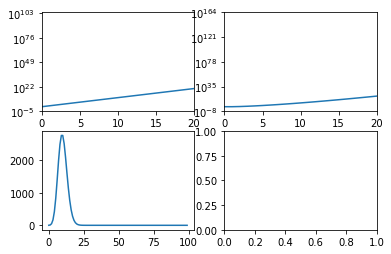

In [31]:
fig, ax = plt.subplots(2, 2)
ax[0][0].set_xlim(0, 20)
ax[0][0].plot(x_power)
ax[0][0].set_yscale("log")
ax[0][1].set_xlim(0, 20)
ax[0][1].plot(x_factorials)
ax[0][1].set_yscale("log")

ax[1][0].plot(e_x_series)
plt.show()


Using generators

In [88]:
from itertools import repeat
num_iters = 100

## Generator function that returns x^y where
## y increases at each call
def powers(x):
    pow = x
    for i in repeat(None):
        yield pow
        pow = pow * x
    
def factorial():
    prod = 1.0
    fact = 1.0
    for i in repeat(None):
        prod = prod * fact
        yield prod
        fact = fact + 1.0
        
        
    
num = 30.

e_x = 1.0
p = powers(num)
f = factorial()
for i in range(1,num_iters):
    n1 = next(p)
    n2 = next(f)
    e_x += n1/n2
    #if i % 100 == 0:
    #print("{} {:15.2f} {:15.2f} {:5.2f} {:5.2f}".format(i, n1, n2, n1/n2, e_x))
    #print(i, next(p), next(f))
print("{:2.5e} {:2.5e} {:3.8f}".format(e_x, np.exp(num), np.exp(num)-e_x))



1.06865e+13 1.06865e+13 -0.00195312


Measure error as the number of iterations increase

1.06865e+13 1.06865e+13 -0.00195312
[-0.001953125, -0.001953125, -0.001953125, -0.001953125, -0.001953125, -0.001953125, -0.001953125, -0.001953125, -0.001953125, -0.001953125, -0.001953125, -0.001953125, -0.001953125, -0.001953125, -0.001953125, -0.001953125, -0.001953125, -0.001953125, -0.001953125, -0.001953125]


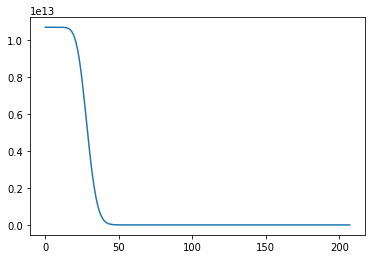

In [108]:
num = 30.
num_iters = 209

e_x = 1.0
p = powers(num)
f = factorial()
error = []
e_x_actual = np.exp(num)
for i in range(1,num_iters):
    n1 = next(p)
    n2 = next(f)
    e_x += n1/n2
    error.append(e_x_actual - e_x)
    #if i < 10:
    #    print("{} {:15.2f} {:15.2f} {:5.2f} {:5.2f} {:5.2f}".format(i, n1, n2, n1/n2, e_x, error[-1]))
    #print(i, next(p), next(f))
print("{:2.5e} {:2.5e} {:3.8f}".format(e_x, e_x_actual, e_x_actual - e_x))
print(error[-20:])
fig, ax = plt.subplots(1, 1)
## to do: add a subplot that zooms into the trailing iterations
ax.plot(error)
#ax.set_ylim(-.2, .2)
plt.show()

Adjust the number of iterations till error drops below threshold

Exercises:
Go crazy with other Taylor series expansions!